In [1]:
import pickle
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
# Generate a wide variety of distinguishable colors
available_colors = list(plt.get_cmap("tab10").colors)  # 'tab10' provides 10 distinct colors

# List of categories (order matters)
categories = [
    "batteries-non-rechargable-primary",
    "coaxial-cables-rf",
    "microphones",
    "cable-ties-and-zip-ties",
    "printers-label-makers"
]

# Assign each category a unique color dynamically
color_map = {category: available_colors[i % len(available_colors)] for i, category in enumerate(categories)}
color_map["default"] = "black"  # Fallback color

def get_category_color(path):
    """Determine color based on file path."""
    for category, color in color_map.items():
        if category in path:
            return color
    return color_map["default"]

# Extracting labels and their corresponding colors based on the paths
for file_path in doc_paths:
    label_color = get_category_color(file_path)
    print(f"File: {file_path}, Label Color: {label_color}")


File: ../02-data/00-testing/batteries-non-rechargable-primary/AAA4000C210, Label Color: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
File: ../02-data/00-testing/batteries-non-rechargable-primary/123, Label Color: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
File: ../02-data/00-testing/batteries-non-rechargable-primary/1cr2, Label Color: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
File: ../02-data/00-testing/batteries-non-rechargable-primary/27ASPEC, Label Color: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
File: ../02-data/00-testing/batteries-non-rechargable-primary/357-303zb, Label Color: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
File: ../02-data/00-testing/batteries-non-rechargable-primary/386-301, Label Color: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
File: ../02-data/00-testing/batteries-non-rechargable-primary/392-384z, Label Color: (0.12156862745098039, 0.4666666666666667

In [11]:
with open("../02-data/03-VSM/01-Word2Vec/word2vec-50.pkl", "rb") as f:
    document_vectors = pickle.load(f)
 
doc_paths = list(document_vectors.keys())  # File paths as labels
doc_vectors = np.array(list(document_vectors.values()))  # Convert dict to array

k = 5  
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(doc_vectors)

clustered_docs = dict(zip(doc_paths, cluster_labels))


In [12]:
sil_score = silhouette_score(doc_vectors, cluster_labels)
print(f"Silhouette Score: {sil_score}")

# Initialize an empty list to store true labels
true_labels = []

# Loop through each document path
for path in doc_paths:
    # Check if any of the categories are in the document path
    for category in categories:
        if category in path:
            true_labels.append(category)
            break  # Stop once the correct category is found

# Ensure that the true_labels list has the same length as the cluster_labels list
assert len(true_labels) == len(cluster_labels), "Mismatch between true labels and cluster labels length."

# Now you can compute the ARI score
ari_score = adjusted_rand_score(true_labels, cluster_labels)
# Evaluate with Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(true_labels, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari_score}")


Silhouette Score: 0.2764628485506015
Adjusted Rand Index (ARI): 0.14783889393651914


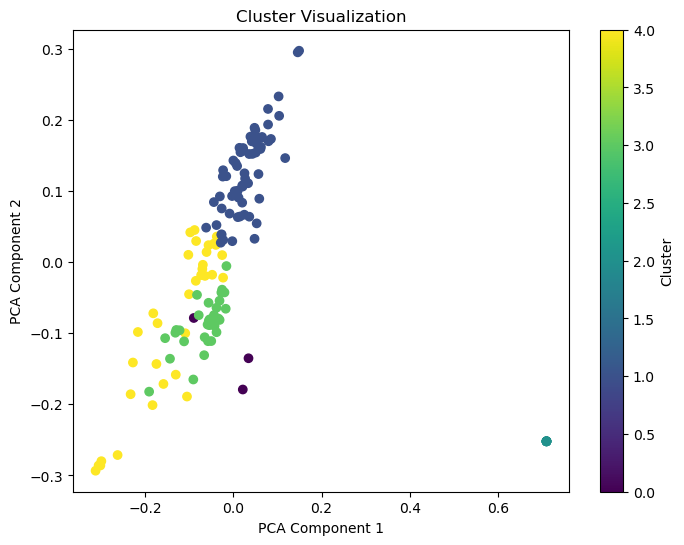

In [13]:
# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(doc_vectors)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Cluster Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()